In [9]:
import split_folders
import os


In [11]:
#Split to training, validation and test dataset
#params: inputpath,outputpath, seed to reproduce
#param: ratio default for training and validation (.8, .2) for ML and 
# training, validation and test for NN
inputpath=input("Enter the data folder: ")

def split_folders_ML(inputpath="./data",outputpath="output",seed=1337,ratio=(.8, .2)):
    try:
        split_folders.ratio(inputpath, outputpath, seed, ratio) # default values
        if len(ratio)==3:
            test,train,validation=[folder for folder in os.listdir(outputpath)]
            print(test,train,validation)
            train,validation=os.path.abspath(outputpath)+"/"+train+"/", os.path.abspath(outputpath)+"/"+validation+"/"
            test=os.path.abspath(outputpath)+"/"+test+"/"
            print("Location for the training, validation and test sets: ",  train,validation,test)
        else:
            train,test=[folder for folder in os.listdir(outputpath)]
            train,validation=os.path.abspath(outputpath)+"/"+train+"/", os.path.abspath(outputpath)+"/"+validation+"/"
            print("Location for the training and validation sets: ",  train,validation)
    except:
        print('Check the entered value:\n Input path: {0}\n, Output path:{1}\n,seed: {$2}\n, ratio (tuple ranges 0 to 1): {3}\n',
              inputpath,outputpath,seed,ratio)
    return train,validation,test
        
#
train,validation,test=split_folders_ML(inputpath,"output",1337,(.8,.1,.1))

Enter the data folder: ./data
test train val
Location for the training, validation and test sets:  /Users/devb/ImageProcessing/output/train/ /Users/devb/ImageProcessing/output/val/ /Users/devb/ImageProcessing/output/test/


In [12]:
#make sure tempory checkpoint of ipython doesn't exists
import os
del_ipython_temp_dir = ['rm -r ./output/test/.ipynb_checkpoints/','rm -r ./output/train/.ipynb_checkpoints/', 'rm -r ./output/val/.ipynb_checkpoints/','rm -r ./output/.ipynb_checkpoints']

[os.system(folder) for folder in del_ipython_temp_dir]


[256, 256, 256, 256]

In [13]:

import tensorflow as tf
from matplotlib import pyplot as plt

filename = tf.placeholder(tf.string, name="inputFile")
fileContent = tf.read_file(filename, name="loadFile")
image = tf.image.decode_jpeg(fileContent, name="decodeJpeg")
resize_nearest_neighbor = tf.image.resize_images(image, size=[224,224], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
resize_image_with_crop_or_pad = tf.image.resize_image_with_crop_or_pad(image, target_height=224, target_width=224)

def augementation_resize(img):
    sess = tf.Session()
    feed_dict={filename: img}
    with sess.as_default():
        actualImage = image.eval(feed_dict)
        plt.imshow(actualImage)
        plt.title("original image")
        plt.show()

        actual_resize_image_with_crop_or_pad = resize_image_with_crop_or_pad.eval(feed_dict)
        plt.imshow(actual_resize_image_with_crop_or_pad)
        plt.title("resize_image_with_crop_or_pad")
        plt.show()

        actual_resize_nearest_neighbor = resize_nearest_neighbor.eval(feed_dict)
        plt.imshow(actual_resize_nearest_neighbor)
        plt.title("nearest neighbor resize")
        plt.show()
    return actual_resize_image_with_crop_or_pad,actual_resize_nearest_neighbor

augementation_resize("/Users/devb/Imagery/output/test/barley/8892912158_1a184b6c52_z.jpg")




Instructions for updating:
Colocations handled automatically by placer.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

(array([[[129, 108,  27],
         [125,  99,  22],
         [122,  88,  17],
         ...,
         [122, 158,  58],
         [121, 157,  61],
         [120, 155,  61]],
 
        [[129, 132,  53],
         [128, 127,  45],
         [126, 115,  33],
         ...,
         [121, 157,  57],
         [121, 157,  57],
         [122, 158,  60]],
 
        [[127, 145,  61],
         [129, 141,  55],
         [131, 135,  50],
         ...,
         [120, 156,  56],
         [121, 158,  55],
         [122, 160,  57]],
 
        ...,
 
        [[165, 172, 121],
         [164, 173, 120],
         [166, 175, 120],
         ...,
         [165, 135,  97],
         [161, 136,  95],
         [159, 136,  94]],
 
        [[164, 173, 120],
         [165, 174, 119],
         [165, 176, 118],
         ...,
         [168, 135, 100],
         [164, 136,  97],
         [160, 137,  96]],
 
        [[164, 173, 120],
         [163, 174, 116],
         [165, 176, 116],
         ...,
         [168, 135, 100],
  

In [156]:
# writting the file to the test directory, 
#Commented out since we are using ImageDataGenerator for augmentaion techiques later
'''import cv2

for  path,subdirs,files in os.walk(train):
    for name in files:
            img_file= os.path.join(path, name)
            image1,image2=augementation_resize(img_file)
            #cv2.imwrite(os.path.join(path, name)+'resize.jpeg',image1)
            #cv2.imwrite(os.path.join(path, name)+'resize.jpeg',image2)'''

"import cv2\n\nfor  path,subdirs,files in os.walk(train):\n    for name in files:\n            img_file= os.path.join(path, name)\n            image1,image2=augementation_resize(img_file)\n            #cv2.imwrite(os.path.join(path, name)+'resize.jpeg',image1)\n            #cv2.imwrite(os.path.join(path, name)+'resize.jpeg',image2)"

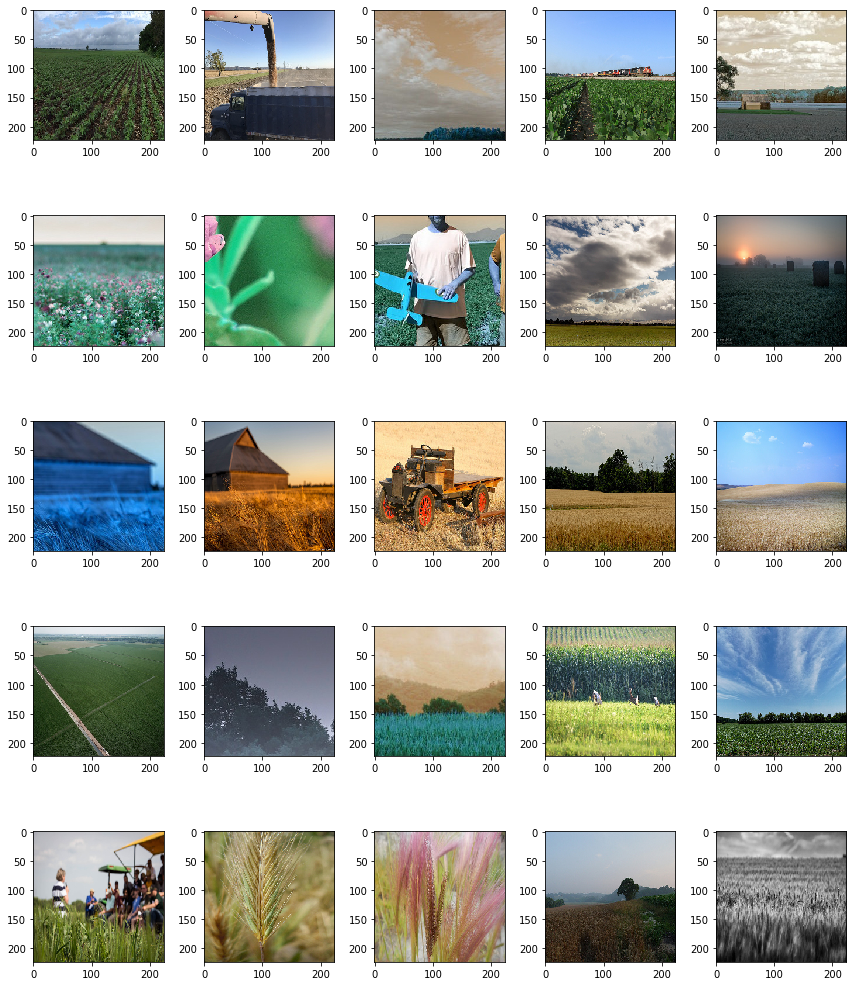

In [185]:
#Quick data visualization
# display some images for every different crops

import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import cv2


# input path for the images
def data_visualize(train,pic_size = 224):
    plt.figure(0, figsize=(12,20))
    cpt = 0
    for crops in os.listdir(train):
        for i in range(1,6):
            cpt = cpt + 1
            plt.subplot(7,5,cpt)
            img = load_img(train + crops + "/" +os.listdir(train + crops)[i], target_size=(pic_size, pic_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    plt.show()

data_visualize(train,224)


In [186]:
def number_of_images(train):
    # count number of train images for each crop
    for crop in os.listdir(train):
        print(str(len(os.listdir(train + crop))) + " " + crop + " images")
        
number_of_images(train)

88 soybean images
64 alfalfa images
74 wheat images
45 corn images
31 barley images


In [187]:
# using keras ImageDataGenerator to perform data augmentation such as (randomly rotating the image, zooming, etc.)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# batch_size number of images to feed into the NN for every batch

base_path = os.path.join(os.getcwd(),"output/")
def image_Data_Generator(batch_size = 20,pic_size = 224):
    datagen_train = ImageDataGenerator()
    datagen_validation = ImageDataGenerator()


    train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                        target_size=(pic_size,pic_size),
                                                        color_mode="rgb",
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=True)

    validation_generator = datagen_validation.flow_from_directory(base_path + "val",
                                                                  target_size=(pic_size,pic_size),
                                                                  color_mode="rgb",
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=False)
    return train_generator,validation_generator

train_generator,validation_generator=image_Data_Generator(20,224) 

Found 302 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


In [138]:
# Setup our Convolutional Neural Network (CNN) 
#We define our CNN with the following global architecture:
# 4 convolutional layers : will extract relevant features from the images 
#2 fully connected layer: use these features to classify

from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
# number of possible label values
nb_classes = 5

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(224, 224,3)))
model.add(BatchNormalization()) #normalization improves the performance and stability of NNs with zero mean and unit variance.
model.add(Activation('relu'))   #ReLU function to add non linearity in our CNN
model.add(MaxPooling2D(pool_size=(2, 2))) #Pooling for dimensionality reduction (important feature extraction)
model.add(Dropout(0.25))        #Dropout: reduces overfitting by randomly not updating the weights of some nodes.

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax')) #softmax activation function for multi-label classification.

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
# number of epochs to train the NN
epochs = 2

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.n//train_generator.batch_size,
                              epochs=epochs,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.n//validation_generator.batch_size,
                              callbacks=callbacks_list
                              )


Epoch 1/2
3/3 [==============================] - 16s 5s/step - loss: 1.7589 - acc: 0.2083

Epoch 00001: val_acc improved from -inf to 0.20833, saving model to model_weights.h5
16/16 [==============================] - 272s 17s/step - loss: 1.8668 - acc: 0.2848 - val_loss: 1.7589 - val_acc: 0.2083
Epoch 2/2
3/3 [==============================] - 14s 5s/step - loss: 1.5248 - acc: 0.2917

Epoch 00002: val_acc improved from 0.20833 to 0.29167, saving model to model_weights.h5
16/16 [==============================] - 247s 15s/step - loss: 1.4933 - acc: 0.4371 - val_loss: 1.5248 - val_acc: 0.2917


In [17]:
# save CNN model structure to JSON 
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


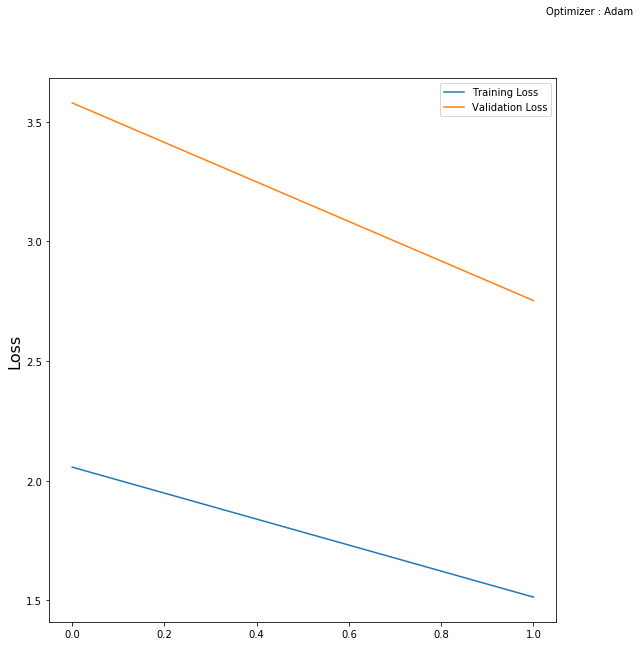

In [19]:
# Analyze output
#Visualize the the training and validation loss
#output saved in ‘history’ variable. 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.show()

<Figure size 432x288 with 0 Axes>

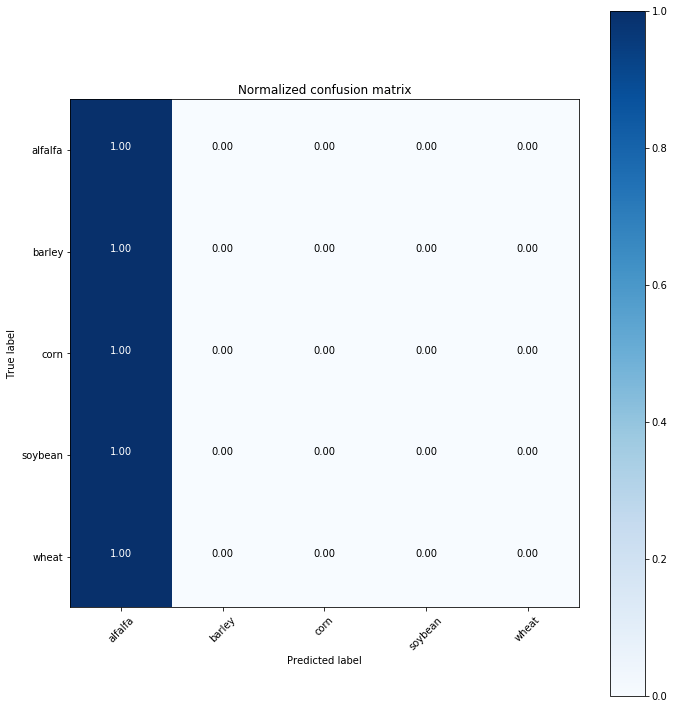

In [35]:

#confusion matrix in order to see how our model classified the images
# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [106]:
#Prediction using test data
from tensorflow.keras.models import model_from_json
import numpy as np
import os
from keras.preprocessing import image

class CropsModel(object):

    CROP_LIST = ["alfalfa", "barley","corn", "soybean","wheat"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model._make_predict_function()

    def predict_crops(self, img):
        self.preds = self.loaded_model.predict(img)
        return CropModel.CROP_LIST[np.argmax(self.preds)]

if  __name__ == "__main__" :
    img_width, img_height = 224, 224
    base_path=os.path.join(os.getcwd(),"output","test")
    model=CropsModel("model.json","model_weights.h5")
    file=open('result.txt',"w")
    for path, subdirs, files in os.walk(base_path):
        for name in files:
            img_file= os.path.join(path, name)
            imag = image.load_img(img_file, target_size=(img_width, img_height))
            x = image.img_to_array(imag)
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])
            pred = model.predict_crops(images)
            file.write(img_file+'  ' +img_file.split('/')[-2]+' '+pred+'\n')


In [112]:
import pandas as pd
file=pd.read_csv("result.txt",delimiter=' ',names=['File','','Actual','Predicted'])

In [114]:
file

,File,,Actual,Predicted
0,/Users/devb/Dockerfile/output/test/soybean/428...,NaN,soybean,alfalfa
1,/Users/devb/Dockerfile/output/test/soybean/435...,NaN,soybean,alfalfa
2,/Users/devb/Dockerfile/output/test/soybean/439...,NaN,soybean,alfalfa
3,/Users/devb/Dockerfile/output/test/soybean/310...,NaN,soybean,alfalfa
4,/Users/devb/Dockerfile/output/test/soybean/424...,NaN,soybean,alfalfa
5,/Users/devb/Dockerfile/output/test/soybean/430...,NaN,soybean,alfalfa
6,/Users/devb/Dockerfile/output/test/alfalfa/837...,NaN,alfalfa,alfalfa
7,/Users/devb/Dockerfile/output/test/alfalfa/765...,NaN,alfalfa,alfalfa
8,/Users/devb/Dockerfile/output/test/alfalfa/288...,NaN,alfalfa,alfalfa
9,/Users/devb/Dockerfile/output/test/alfalfa/205...,NaN,alfalfa,alfalfa
